Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,569 (115.50 KB)

 Trainable params: 29,569 (115.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,569 (115.50 KB)

 Trainable params: 29,569 (115.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,569 (115.50 KB)

 Trainable params: 29,569 (115.50 KB)

 Non-trainable params: 0 (0.00 B)





782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.6842 - binary_crossentropy: 0.6352 - loss: 0.6352
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7027 - binary_crossentropy: 0.5693 - loss: 0.6045
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.6973 - binary_crossentropy: 0.5798 - loss: 0.6200

scores_basic:  0.6306084990501404
scores_l1:  0.5697898864746094
scores_l2:  0.5764471292495728


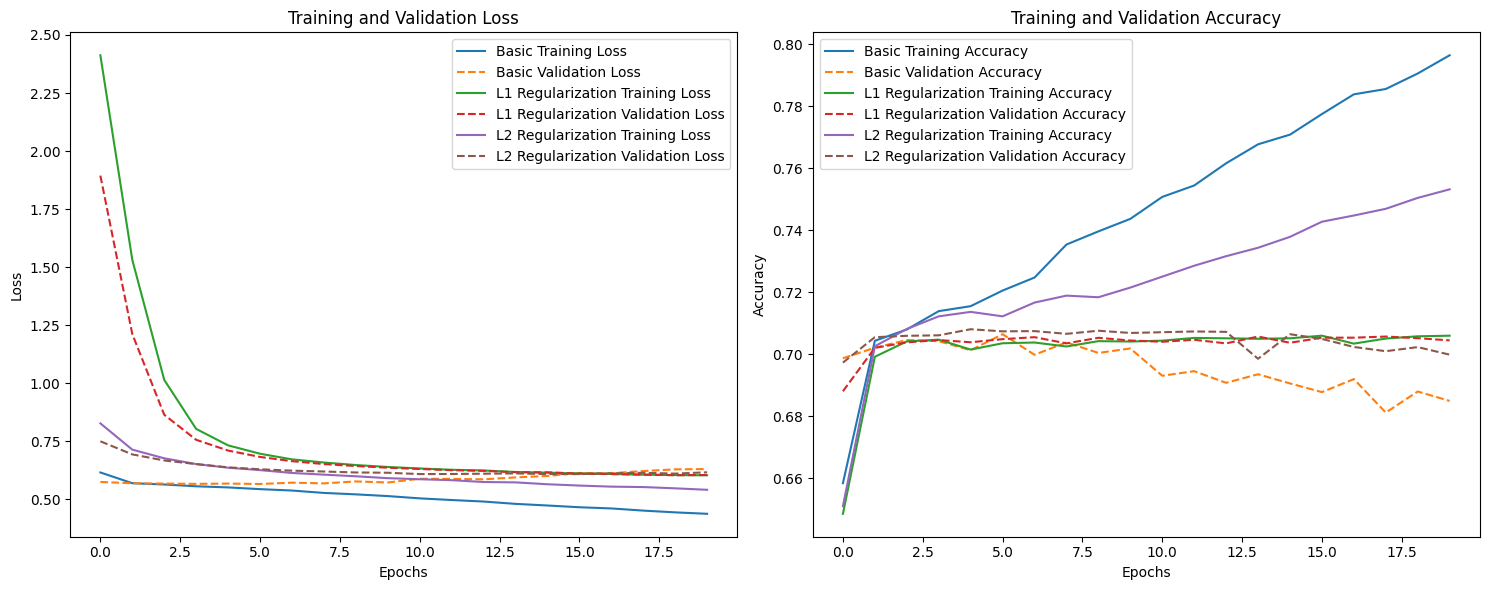

In [5]:
import numpy as np
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

def additional_visualization(histories):
    """
    각 모델의 학습 및 검증 손실과 정확도를 시각화
    :param histories: 학습 기록 리스트 (이름, history 튜플 형태)
    """
    # 학습 및 검증 손실 시각화
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for name, history in histories:
        plt.plot(history.history['loss'], label=f'{name} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 학습 및 검증 정확도 시각화
    plt.subplot(1, 2, 2)
    for name, history in histories:
        plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    
    return results

'''
1. L1, L2 정규화를 적용한 모델과 비교하기 위한
   하나의 기본 모델을 자유롭게 생성합니다.
'''

def Basic(word_num):
    
    basic_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape= (word_num, ), activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    return basic_model

'''
2. 기본 모델에 L1 정규화를 적용합니다.
   입력층과 히든층에만 적용하세요.
'''

def L1(word_num):
    
    l1_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape= (word_num,),activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1(0.001)),
        tf.keras.layers.Dense(128, activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l1(0.001)),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    return l1_model

'''
3. 기본 모델에 L2 정규화를 적용합니다.
   입력층과 히든층에만 적용하세요.
'''

def L2(word_num):
    
    l2_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, 
        input_shape= (word_num, ),
         activation = 'relu' , 
         kernel_regularizer = tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(128, activation = 'relu' , 
        kernel_regularizer = tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    return l2_model


'''
4. 세 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Basic, L1, L2 함수를 이용해 세 모델을 불러옵니다.
   
   Step02. 세 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 세 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 세 모델을 학습시킵니다. 
           세 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다. 
           검증용 데이터도 설정해주세요.
   
   Step05. 세 모델을 테스트하고 
           binary crossentropy 값을 출력합니다. 
           셋 중 어느 모델의 성능이 가장 좋은지 확인해보세요.
'''

def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    train_labels = train_labels.reshape(-1, 1)  # (500,) -> (500, 1)
    test_labels = test_labels.reshape(-1, 1)    # (500,) -> (500, 1)
    
    basic_model = Basic(word_num)  # 기본 모델입니다.
    l1_model = L1(word_num)     # L1 정규화를 적용할 모델입니다.
    l2_model = L2(word_num)     # L2 정규화를 적용할 모델입니다.
    
    basic_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'binary_crossentropy'])
    l1_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'binary_crossentropy'])
    l2_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'binary_crossentropy'])
    
    basic_model.summary()
    l1_model.summary()
    l2_model.summary()
    
    basic_history = basic_model.fit(train_data, train_labels, epochs = 20, batch_size = 500 , validation_data = (test_data, test_labels), verbose = 0)

    print('\n')

    l1_history = l1_model.fit(train_data, train_labels, epochs = 20, batch_size = 500 , validation_data = (test_data, test_labels), verbose = 0)

    print('\n')

    l2_history = l2_model.fit(train_data, train_labels, epochs = 20, batch_size = 500 , validation_data = (test_data, test_labels), verbose = 0)
    
    scores_basic = basic_model.evaluate(test_data, test_labels)
    scores_l1 = l1_model.evaluate(test_data, test_labels)
    scores_l2 = l2_model.evaluate(test_data, test_labels)
    
    print('\nscores_basic: ', scores_basic[-1])
    print('scores_l1: ', scores_l1[-1])
    print('scores_l2: ', scores_l2[-1])
    
    
    return basic_history, l1_history, l2_history

if __name__ == "__main__":
    # main 함수 실행 및 결과 저장
    basic_history, l1_history, l2_history = main()  # 학습 기록 반환

    # 모델 학습 기록을 전달받아 추가 시각화 실행
    histories = [
        ('Basic', basic_history),
        ('L1 Regularization', l1_history),
        ('L2 Regularization', l2_history)
    ]
    additional_visualization(histories)